# 03 평가
## 머신러닝의 프로세스 구성 = "데이터가공/변환", "모델 학습/예측", "평가"
특히 본 장에서는 이진분류에 대한 성능평가지표 중심

## 머신러닝 모델의 예측 성능을 평가하는 성능 평가 지표(EvaluationMetric)
는 일반적으로 모델이 분류냐 회귀냐에 따라 여러종류로 나뉜다.(회귀 경우 대부분 오차평균값기반 --5장_회귀)

### 분류의평가방법 : 실제 결과 데이터와 예측 결과데이터가 얼마나 정확하고 오류가 적게발생하는가에 기반하지만,
###  단순히 정확도만 가지고 판단할경우 잘못된 평가결과에 빠질수있다. 
      
#### *분류( 결정 클래스값 종류의 유형에 따라 )
   1) 이진분류 : 긍정/부정과 같은 2개의 결괏값만을 가짐
   
   2) 멀티분류 : 여러개의 결정 클래스값을 가짐
   
##### 아래의 6개의 분류성능지표는 이진/멀티 분류 모두에 적용되는 지표.
 
 ##### 특히 이진분류에서 더욱 중요하게 강조되는 지표이다
 
      1) 정확도(Accuracy)
      
      2) 오차행렬(Confusion Matrix)
      
      3) 정밀도(Precision)
      
      4) 재현율(Recall)
      
      5) F1 스코어
      
      6) ROC AUC

 ### 회귀 : 대부분 실제값과 예측값의 오차평균값에 기반(5장에서 상세하게 설명)

## 01.정확도(Accuracy)

### 정확도 : 실제데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표

### = ${예측결과가 동일한 데이터 건수 \over 전체 예측 데이터 건수}$



이는 직관적으로 모델예측성능을 나타내는 평가지표다.

하지만, 이진 분류의 경우 ML모델의 성능을 왜곡할수있음.

성능을 왜곡하는 예제를 살펴보자

타이타닉 예제에서 별다른 알고리즘 적용없이 무조건 성별이 여자인경우 생존으로 예측해도 비슷할수있다.

단지 성별조건하나만을 가지고 결정하는 별거 아닌 알고리즘도 높은 정확도를 나타내는 상황이 발생하는 것.

#### 사이킷런 BaseEstimator클래스 상속받아 아무런 학습하지않고 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성

##### 사이킷런은 BaseEstimator를 상속받으면 Customized형태의 Estimator를 개발자가 생성할수있다.
##### 생성할 MyDummyClassifier클래스는 학습을 수행하는 fit()메서드는 아무런수행하지않으며, 예측을 수행하는 predict()메서드는 단순히  sex피쳐가 1이면0 으로 구분하는 단순한 classifier이다.

In [183]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit()메서드는 아무것도 학습하지않음.
    def fit(self, X, y=None):
        pass
    
    # predict()메서드는 단순히 sex피쳐가 1이면0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred
    

이제 생성된 커스텀클래스를 이용해 타이타닉 생존자 예측 수행.

In [184]:
# 데이터 가공 내역 정리, 함수로 만들어 쉽게 재사용
# 데이터 전처리를 전체적으로 호출하는 함수 transform_featurs(): null처리, 포매팅, 인코딩 수행 내부 함수로 구성

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv("titanic_train.csv")
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)  #전처리함수
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

#위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는 : {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는 : 0.7877


#### 이렇게 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약78.77%로  꽤 높은 수치가 나올수있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 합니다.(cf. 타이타닉예측결과 78%, -하이퍼파라미터튜닝후-87%)


#### 특히, 정확도는 불균형한(imbalanced)레이블 값 분포에서 ML모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.
#### 예를 들어, 100개의 데이터중에 90개 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고한다면 무조건 0으로 예측결과를 반환하는 ML모델의 경우라도 정확도가 90%가 된다

#### 유명한 MNIST데이터세트를 변환해 불균형한 데이터 세트로 만든뒤에 정확도 지표 적용시 어떤 문제가 발생하는지 살펴보자
MNIST설명 URL : https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset

MNIST데이터세트는 0부터9까지의 숫자 이미지의 픽셀 정보를 가지고있음.이를 기반으로 숫자Digit를 예측하는데 사용됨.

@딥러닝을 공부할 때 반드시 거쳐야할 Hello, World같은 존재입니다

사이킷런은 load_digits() API를 통해 제공한다.

이것을 레이블값이 7인것만 True, 나머지는 모두 False로 변환하여 이진분류 문제로 변형해보자(즉, 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형하는것)

이렇게 불균형한 데이터 세트에 0으로 예측하는 classifier를 이용해 정확도를 측정하면 약90%에 가까운 예측 정확도를 나타낸다.

**아무것도하지않고 무조건 특정한 결과로 찍어도 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날수있는 것이 정확도 평가지표의 맹점이다**

In [186]:
#불균형한 데이터 세트와 Dummy Classifier를 생성
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    #입력값으로 들어오는 X데이터세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)
    
    
#사이킷런의 내장 데이터세트를 이용해 MNIST로딩
digits = load_digits()

#digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

#### 다음으로 불균형한 데이터로 생성한 y_test의 데이터분포도를 확인하고 MyFakeClassifier를 이용해 예측과 평가를 수행해보자

In [187]:
#불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :' , y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())


#dummy classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


#### 이처럼 정확도 평가지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안됩니다.
### 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러가지 분류 지표와 함께 적용해야한다. 먼저 True/False, Positive/Negative의 4분면으로 구성되는 오차행렬(Confusion Matrix)에 대해 설명해보자

## 02.오차행렬(Confusion Matrix)

### 이진 분류에서 성능지표로 잘활용됨. 

### 이진분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지 함께 나타내는 지표

#### 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냄.

<img src="confusionmatrix.jpg">

예측 클래스와 실제 클래스의 Positive결정값과 Negative결정값의 결합에 따라 결정됨.

TN : 예측값을 Negative값0으로 예측했고 실제 값도 Negative 값 0 

FP : 예측값을 Positive 값1로 예측했는데 실제 값은 Negative 값 0

FN : 예측값을 Negative값0으로 예측했는데 실제 값은 Positive값1

TP : 예측값을 Positive값1로 예측했는데 실제 값 역시 Positive값1

사이킷런은 오차행렬을 구하기위헤 confusion_matrix() API를 제공합니다.

정확도 예제에서 다룬 MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현해보자

(MyFakeClassifier 예측결과인 fakepred와 실제 결과인 y_test를 인자로 입력)

In [188]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)


array([[405,   0],
       [ 45,   0]], dtype=int64)

출력된 오차 행렬은 ndarray 형태


일단, 예측을 무조건 negative(false)로 했기에 4분면중 오른쪽은 0건.

모두 false이므로 false로 예측한 TN이 405개, 그중 45개만 true인데 false로 예측함.(FN=45개)

##### TP,TN,FP,TN값은 Classifier성능의 여러 면모를 판단할 수 있는 기반 정보를 제공합니다. 이값을 조합해 Classifier의 성능을 측정할수있는 주요지표인 정확도(Accuracy), 정밀도(Precision), 재현율(Recall)값을 알수있다.

##### 정확도는 예측값과 실제값이 얼마나 동일한가에 대한 비율만으로 결정된다. 즉 , TN과 TP에 좌우된다.
$정확도 = {(TN + TP) \over ( TN + FP + FN + TP)}$ 

#### 일반적으로, 이진분류모델에서는 많은 데이터중에서 중점적으로 찾아야하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하는 경우가 많음. 

#### 예를들어 사기행위예측모델에서는 사기행위가 Positive 양성으로 1, 정상행위가 Negative음성으로0값으로 설정하는 경우가 일반적이다.

##### 불균형한 이진 분류데이터세트에서는 Positive데이터 건수가 매우 작기때문에 데이터에 기반한 ML알고리즘은 positive보다 negative로 예측 정확도가 높아지는 경향이발생한다. 

##### TN은 매우커지고, TP는 매우작아짐. 또한 Negative로 예측할때 정확도가 높기 때문에 FN이 매우작고, FP역시 매우작아진다. 

#### 결과적으로 정확도 지표는 비대칭한 데이터세트에서 Positive에 대한 예측 정확도를 판단하지 못한채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게된다.

### 정확도는 분류모델의 성능을 측정할 수 있는 한 가지 요소일 뿐. 불균형한 데이터세트에서 정확도만으로는 모델 신뢰도가 떨어질수있는 사례를 보았으니, 다음으로는 불균형한데이터세트에서 정확도보다 더 선호되는 평가지표인 정밀도와 재현율에 대해 알아보자.

**정밀도(Precision) = (TP/TP+FP)**

양성이라고 판정한 것 중에 실제 양성 개수



**민감도(sensitivity) = TP/(TP+FN) = 재현율(recall)**

TP + FN : 전체 양성 개수

TP : 양성으로 판정했는데 실제로 양성인 경우



**특이도(specificity)=TN/(TN+FP)**

TN + FP : 전체 음성 개수

TN : 음성으로 판정했는데 실제로 음성인 경우


#민감도와 특이도는 한 쪽이 증가하면 다른 한 쪽이 감소하는 경향을 보일 수 있습니다.

예를 들어 검사 항목을 모두 양성으로 판정하면 민감도는 1이 되지만

특이도는 0이 되며 반대로 모두 음성으로 판정하면 특이도는 1이 되지만 민감도는 0이 됩니다.

궁극적으로는 민감도와 특이도가 둘 다 높게 나오는 방법을 찾아야 합니다.


**정확도(accuracy) = (TP+TN) / (TP+FN+FP+TN)**

전체 중에 양성과 음성을 맞춘 개수




## 03.정밀도(Precision)와 재현율(Recall)

정밀도 : TP/TP+FP

재현율(민감도) : TP/(TP+FN)

### 정밀도 : 예측을 Positive로 한 대상 중, 예측과 실제 값이 Positive로 일치한 데이터의 비율 
### 재현율 : 실제 값이 Positive인 대상 중, 예측과 실제 값이 Positive로 일치한 데이터의 비율

 - 참고: 정밀도는 Positive예측 성능을 더욱 정밀하게 측정하기위한 평가지표로 양성예측도 라고도 불린다

 - 재현율 = 민감도(Sensitivity) = TPR(True Positive Rate)

#### 재현율 ~ 암판단모델, 금융사기(보험사기) 등 

1) 실제 Positive양성 데이터를 Negative로 잘못판단하게되면 업무상 큰영향이 발생하는 경우

   ex. 암환자(Positive)를 음성으로 판단할경우 생명위험. opp. 암이아닌데(negative) 양성으로 판단할경우 재검하면됨.

   ex. 사기거래(Positive)를 Negative로 오판단할경우 회사손해.


2) 보통 재현율이 정밀도 보다 상대적으로 중요한 업무가 많지만. 정밀도가 중요한 경우도있음.

ex.스팸메일(positive)을 negative인 일반메일로 분류할경우 문제없음(사용자불편수준), 실제 일반메일(negative)을 positive(스팸메일)로 분류할경우 메일수신이 안되어 업무차질발생.


재현율과 정밀도 모두 TP를 높이는데 초점이맞추어져있으나,
재현율은 FN(실제 P, 예측 N)을 낮추는데
정밀도는 FP를 낮추는데 초점을 맞춤.

모두 높은수치를 얻는것이 좋다. 반면에 둘중 한평가만 지표가 매우높고 다른하나는 매우 낮을 경우 바람직하지않음

앞의 타이타닉에선 정확도에만 초점을 맞추었다면, 이번에 오차행렬 및 정밀도, 재현율을 모두 구하여 예측성능을 평가해보자
사이킷런은 API를 제공한다(정밀도 precision_score(), 재현율 recall_score())

평가의 편의를 위해 confusion matrix, accracy, precision, recall 등 한번에 호출하는 함수를 만들자. 그리고 타이타닉 데이터를 다시 로드하여 가공한 뒤 로지스틱 회귀로 분류를 수행하겠습니다

In [189]:
from sklearn.metrics import(accuracy_score, precision_score, recall_score, confusion_matrix)
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

이제 로지스틱 회귀기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가를 수행합니다


In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할


titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.20, random_state=11)
lr_clf = LogisticRegression(max_iter=1000)

In [191]:
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.849162, 정밀도:0.7742, 재현율:0.7869


### 정밀도/재현율 트레이드오프

분류의 결정 임곗값(Threshold)을 조정하여 정밀도와 재현율 수치를 높일수 있다.

하지만 상호보완적인 평가지표이기 때문에 한쪽을 높이면 다른쪽은 떨어지기쉽다 --> 이를 정밀도/재현율의 Trade-off라고한다

사이킷런의 분류알고리즘은
1) 예측데이터가 특정레이블(Lable,결정클래스값)에 속하는지를 계산하기위해 먼저 개별 레이블별로 결정확률을 구한다

2) 예측확률이 큰 레이블값으로 예측하게 된다.

ex) 0이될확률이 10%, 1이될 확률이 90%로 예측되면, 최종 예측은 더큰 확률을 가진 1로예측한다.

일반적으로, 이진 분류에서는 이 **임계값**을 **0.5 즉 50%**로 정하고 이보다 크면 Positive,작으면 Negative로 결정한다

predict_proba() : 개별 데이터별로 예측확률을 반환하는 메서드

테스트 피처 데이터세트를 주면 테스트 피처 레코드의 개별 클래스 예측확률을 반환

cf. predict()와 유사. 반환결과가 예측결과 클래스값이 아닌 예측확률결과

반환값 ndarray는 첫 번째 칼럼이 클래스값0에 대한 예측확률,

두번째 칼럼이 클래스 값1에 대한 예측확률

In [193]:
import numpy as np
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

#예측확률 array와 예측결괏값 array를 병합해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두개의 class중에서 더큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46216576 0.53783424]
 [0.8787286  0.1212714 ]
 [0.87716197 0.12283803]]
두개의 class중에서 더큰 확률을 클래스 값으로 예측 
 [[0.46216576 0.53783424 1.        ]
 [0.8787286  0.1212714  0.        ]
 [0.87716197 0.12283803 0.        ]]


첫번째 칼럼과 두번째 칼럼을 더하면 1이다.(예측확률을 반환함)

두개의 칼럼중에서 더 큰 확률 값으로predict()메서드가 최종 예측하고있음.

*predict()메서드는 predict_proba()메서드에 기반해 생성된 API이다

분류 결정 임계값을 조절해 정밀도와 재현율의 성능 수치를 상화보완적으로 조정할수있다

이를 코드로 구현해보자 (기본 임곗값 0.5)

Binarizer클래스로 구현가능

-사용법: threshold변수를 특정 값으로 설정하고 Binirizer클래스를 객체로 생성한다, 

생성된 Binirizer객체의 fit_trainsform()메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarray의 값을 지정된 threshold보다 같거나 작으면 0으로 크면 1ㄹ로 반환한다

아래 예제를 보자

In [194]:
from sklearn.preprocessing import Binarizer

In [195]:
X = [[1,-1,2],
    [2,0,0],
    [0,1.1, 1.2]]

In [196]:
#X의 개별 원소들이 threshold값보다 같거나 작으면0을 , 크면1을 반환
binarizer = Binarizer(threshold=1.1)

In [197]:
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


이제 Binarizer를 이용해 사이킷런predict()와 의사(pesudo)코드를 만들어보자.

In [198]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold설정값, 분류 결정 임곗값임.
custom_threshold = 0.5

#predict_proba()반환값의 두 번째 칼럼, 즉 positive클래스 칼럼 하나만 추출해 binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


오차 행렬
[[104  14]
 [ 13  48]]
정확도:0.849162, 정밀도:0.7742, 재현율:0.7869


이결과로인해

1) 앞예제의 타이타닉 데이터로 학습된 로지스틱회귀 classifier객체에서 호출된 predict()로 계산된 지표 값과 정확히 같다

2) predict()가 predict_proba()에 기반함을 알수 있다


만일 이 분류 결정 임곗값을 낮추면 평가지표는 어떻게 변할까?

In [199]:
#임곗값을 0.4로 낮춰보자
#Binarizer의 threshold설정값을 0.4로설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

In [200]:
get_clf_eval(y_test, custom_predict)

오차 행렬
[[98 20]
 [10 51]]
정확도:0.832402, 정밀도:0.7183, 재현율:0.8361


임곗값을 낮추니 재현율값이 오르고 정밀도가 떨어짐.

이유는 분류 결정 임곗값은 Positive예측값을 결정하는 확률의 기준이된다. 확률이0.5가 아닌.04부터 positive로예측을 너그럽게 하기때문에
임곗값 값을 낮출수록True값이 많아지게된다


이번에는 임곗값을 0.4부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사해보자.

In [201]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4,0.45,0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list객체 내의 값을 차례로 iteration하면서 evaluation수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        

In [ ]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

0.5와 비교했을때 정확도는 동일하고 정밀도는 약간 떨어졌으나 재현율이 올랐습니다

0.45가 가장적당해보임

지금까지 임곗값 변화에 따른 평가 지표 값을 알아보는 코드를 작성했습니다.

사이킷런은 이와유사한 precision_recall_curve() api를 제공한다 ??!!!

인자값으로는 **실제값 데이터 세트** 와 **레이블 값이 1일 때의 예측확률 값**을 입력

-레이블값이 1일때의 예측확률값 = predict_proba(X_test)[:,1]로 predict_proba()의 반환 ndarray 의 두번째칼럼값에 해당하는 데이터 세트

precision_recall_curve()는 일반적으로 0.11~0.95정도의 임곗값을 담은 넘파이 ndarray와 이 임곗값에 해당하는 정밀도 및 재현율 값을 담은 넘파이 ndarra를 반환합니다

반환되는 임곗값이 너무 작은 값단위로 많이 구성돼 있음. 반환된 임곗값의 데이터가 143건이므로 샘플로 10건만 추출하되, 임곗값을 15단계로 추출해 좀더큰값의 임곗값과 그때의 정밀도와 재현율을 살펴보자

In [203]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곘값을 15 Step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],3))

#15 step단위로 추출된 임계깞에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.104 0.121 0.14  0.186 0.28  0.403 0.563 0.667 0.822 0.947]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


정밀도와 재현율 곡선을 시각화해보자

In [204]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

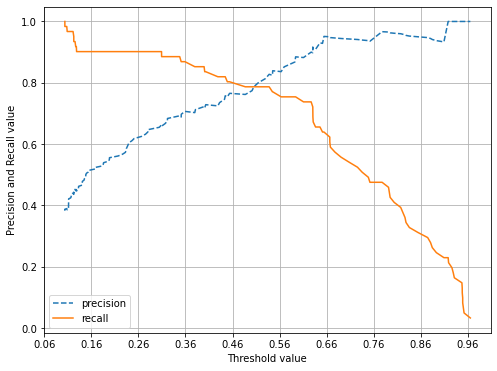

In [205]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 Plot수행. 정밀도는 점섬
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    #x축, y축 label과 legent, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

정밀도는 점섬으로, 재현율은 실선으로 표현.
임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아집니다.
약 0.51지점에서 재현율과 정밀도가 비슷해지는 모습을 보입니다

### 정밀도와 재현율의 맹점

Positive예측의 임곗값을 변경함에 따라 수치가 변경된다.

임곗값의 이러한 변경은 업무환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야한다.


#### 정밀도가 100%가 되는 방법

확실한 기준이 되는 경우만 Positive로 예측. 나머지모두 Negative로 예측

ex.환자가 80세이상이고 비만이며 이전에 암진단받고 암세포크기가 상우0.1%이상이면 무조건 positive.다른경우는 negative로 예측

정밀도 = $TP\over(TP+FP)$ 이므로 전체환자 1000명중 확실한 징후만 가진환자는 단 1명이라고한다면 이 한명만 Positive로 예측(TP=1), 
나머지는모두 Negative로 예측한다(FP=0) . 그럼 정밀도는 1/(1+0)으로 100%가 된다

#### 재현율이 100%가 되는 방법

모든환자를 Positive로 예측. 재현율 = $TP\over(TP+FN)$ 이므로 전체 환자 1000명을 다 Positive로 예측한다

이중 실제 양성인 사람이 30명정도라도 TN이 수치가 포함되지않고 FN은 아예0이므로 $30\over(30+0)$으로 100%가 된다

## 이처럼 어느 한쪽만 참조하면 극단적인 수치 조작이 가능하므로, 정밀도와 재현율의 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용될수있는 평가지표가 필요하다

ex)암예측모델에서 재현율을 높인다고 걸핏하면 양성으로 판단할 경우 환자의 부담과 불평이 커지게 된다

## 04. F1스코어

 정밀도와 재현율을 결합한 지표
 
 어느한쪽으로 치우치치 않는 수치를 나타낼때 상대적으로 높음(ex. A모델은 0.9 와 0.1 이고 B 0.5,0.5 이라면 0.18과 0.5로 B모델이 더우수)

$F1=\frac{2}{\frac{1}{recall}\ +\ \frac{1}{precision}}=2\ *\ \frac{precision\ *\ recall}{precision\ +\ recall}$

In [206]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)

In [207]:
print('F1스코어:{0:.4f}'.format(f1))

F1스코어:0.7805


get_clf_eval()함수에 f1스코어를 구하는 로직을 추가하고, get_eval_by_threshold()함수를 이용해 임곗값 0.4~0.6별로 정확도, 정밀도, 재현율, F1스코어를 알아보겠습니다

In [ ]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    #F1스코어추가
    f1=f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    
    #F1 score print추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
thresholds = [0.4,0.45,0.5,0.55,0.6]
pred_proba= lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값이 0.6일때 가장좋은값이지만 재현율이 크게 감소하고있음.

## 05. ROC곡선과 AUC 스코어
#### Receiver Operation Characteristic Curve, 수신자 판단 곡선

머신러닝의 이진분류모델의 예측성능을 판단하는 중요한 지표

### ROC곡선 : FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선


FPR(False Positive Rate) = x축 = $FP\over(FP+TN)$= $1 - TNR = 1 -특이성$

TPR(True Positive Rate) = y축 = 재현율 = 민감도 cf.이에 대응하는 지표는 TNR(True Negative Rate) 특이성

: TPR(민감도)는 실제 Positive(양성)가 정확히 예측돼야 하는 수준(질병있는사람은 질병있는것으로 양성판정)

<> TNR(특이성)은  음성이 정확히 예측돼야하는 수준

TNR(True Negative Rate) = $TN\over(FP+TN)$

RCC곡선의 특징
1) 가운데 직선은 이진분류의 ROC직선(ex.동전 무작위 던져 앞/뒤를 맞추는 랜덤수준의 이진분류)

2) 가운데 직선의 AUC는 0.5. ROC곡선이 가운데 직선에 가까울수록 성능이 떨어지는것.

3) FPR을 0부터 1까지 변경하면서 TPR의 변화값을 구하는것(임곗값을 변경 하여)
  * 분류결정임계값은 Positive예측값을 결정하는 확률의 기준. FPR을 0으로 하려면 임곗값을 1로지정.


이렇게 임곗값을 1부터 0까지 변화시키면서 FPR을 구하고 FPR값의 변화에 따른 TPR값을 구하는것이 ROC곡산

(so, 임곗값을 1부터0까지 변화시키면서 구한 재현율 곡선과 유사)





         분류결정임곗값(Positive예측값을 결정하는 확률의 기준)

       0 ------------------------------------1

TN=0(Negative가없기때문)  <------------->  FP=0 (Positive가 없음)

FPR=1   <--------------------------------->     FPR=0

사이킷런은 ROC곡선을 구하기위해 roc_curve() API를 제공한다

반환값 : FPR, TPR, 임곗값 모두 array


In [209]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

#반환된 임곘값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출.
#threshold[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index=np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임계값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

#5 step단위로 추출된 임계값에 따른 FPR, TPR값
print('샘플 임곘값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TRP:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곘값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TRP: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


임곗값이 1에 가까운 값에서 점점작아지면서 FPR이 점점커짐

FPR이 조금씩 커질때 TPR은 가파르게 커짐



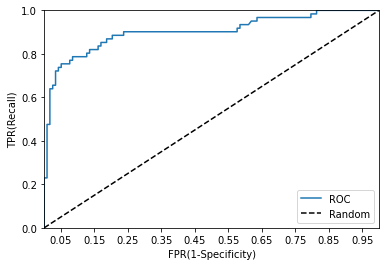

In [210]:
def roc_curve_plot(y_test, pred_proba_c1):
    #임곗값에 따른 FPR, TPR값을 반환받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    #ROC곡선을 그래프 곡선으로 그림.
    plt.plot(fprs, tprs, label='ROC')
    
    #가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')
       
    
    #FPR X축의 Scale을 0.1단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)    
    plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

일반적으로 ROC곡선자체는 FPR과 TPR의 변화값을 보는데 이용하며 분류의 성능지표로 사용되는것은 ROC곡선 면적에 기반한 AUC값으로 결정합니다.(Area Under Curve)

AUC는 1에 가까울수록 좋은 수치. -> AUC가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을수있느냐가 관건.

(가운데직선에서 멀어지고 왼쪽상단모서리쪽으로 가파르게 곡선이 이동할수록 직사각형에 가까운 곡선이되어 1에 가까워짐)

@박지수님첨언 > FPR > 1종오류, TPR ->1- (2종오류) : 검정력

@김태윤님첨언 > (tpr - fpr) 가 최대가 되는 지점을 임계값으로 하면 됩니다


In [211]:
from sklearn.metrics import roc_auc_score
pred_proba= lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC값:{0:.4f}'.format(roc_score))

ROC AUC값:0.9024


타이타닉 생존자 예측 로지스틱 회귀모델의 ROC AUC값은 약 0.9024로 측정됐습니다

마지막으로 get_clf_eval()함수에 ROC AUC값을 측정하는 로직을 추가합니다.

이제 get_clf_eval()함수는 정확도,정밀도,재현율,F1스코어, ROC AUC값까지 출력가능


In [212]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1=f1_score(y_test, pred)
    
    #ROC-AUC추가
    roc_auc=roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    
    #ROC AUC print추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [213]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, F1:0.7805, AUC:0.9024


## 06. 피마 인디언 당뇨병 예측(Pima Indian Diabetes)

Goal 
1) 당뇨병여부를 판단하는 머신러닝 예측모델을 수립

2) 평가지표 적용

data

북아메리카 피마지역원주민의 Type-2 당뇨병결과 데이터

>https://www.kaggle.com/uciml/pima-indians-diabetes-database

book code

> https://github.com/wikibook/pymldg-rev/blob/master/3%EC%9E%A5/3.6%20%ED%94%BC%EB%A7%88%20%EC%9D%B8%EB%94%94%EC%96%B8%20%EB%8B%B9%EB%87%A8%EB%B3%91%20%EC%98%88%EC%B8%A1.ipynb

피처 설명

Pregnancies	: 임신횟수

Glucose	:포도당 부하 검사 수치

BloodPressure	:혈압

SkinThickness	:팔 삼두근 뒤쪽의 피하지방 측정값

Insulin	:혈청 인슐린

BMI	:체질량지수

DiabetesPedigreeFunction	:당뇨 내력 가중치 값

Age	:나이

Outcome	:클래스 결정 값(0,1)


### (A) data를 dataframe으로 로드 , 모듈 import, outcome클래스 결정값의 분포 확인 

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
diabetes_data = pd.read_csv("diabetes.csv")
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

##### (a) 768개 데이터 중, Negative 값0이 500개, Positive 값1이 268개.

### (B) feature타입과 null개수 살펴보자

In [ ]:
diabetes_data.info()

##### (b)

##### 1) Null값 없음

##### 2) 피처의 타입은 모두 숫자형

##### 3) 임신횟수, 나이 --숫자형 피쳐

##### 당뇨검사수치 등 별도의 피처 인코딩은 필요없음


### (C) 로지스틱 회귀를 이용해 예측모델을 생성

데이터세트를 피처데이터/클래스데이터로 나누고, 학습데이터세트와 테스트 데이터 세트로 분리

앞예제에서 사용한 유틸리티함수 get_clf_eval(), get_eval_by_threshold(), precision_recall_curve_plot()을 이용해 성능평가지표 출력

재현율 곡선 시각화

In [ ]:
#피쳐 데이터 세트 X, 레이블 데이터 세트 Y 
#맨 끝이 Outcome칼럼으로 레이블 값임. 갈럼 위치 -1 이용해 추출

X= diabete_data.iloc[:,:-1]
y= diabete_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

#앞서 진행했던함수 복사
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
    
get_clf_eval(y_test, pred, pred_proba)

##### (c) 정확도 77% 재현율 57%. 전체데이터의 65%가 Negative이므로 정확도보다는 재현율성능에 조금더 초점을 맞추자

### (D) 먼저 정밀도 재현율 곡선을 보고 임곗값별 정밀도/재현율 값의 변화를 확인해보자 (precision_recall_curve_plot() 함수이용)

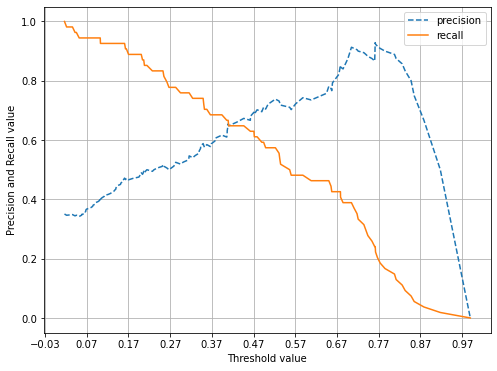

In [218]:
#앞서 진행했던 함수 복사
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #x축을 threshold값으로, y축은 정밀도, 재현율 값으로 각각 Plot수행. 정밀도는 점섬
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #threshold값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    #x축, y축 label과 legent, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

##### (d) 재현율 곡선을 보면 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느정도 균형을 맞출것 같습니다

#### 하지만 두개의 지표 모두 0.7이 안되는 수치!!너무낮아요

### (E) 임곗값을 조작하기전에 원본데이터 DataFrame의 피처값의 분포도를 살펴보겠습니다

In [ ]:
diabetes_data.describe()

##### (e) min()값이 0으로 돼있는 피처가 많음. 예를들어, Glucose피처는 포도당수치인데 min값이0 인건 말이안됨.

### (F) Glucose피처의 히스토그램으로 0의 분포를 보자

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

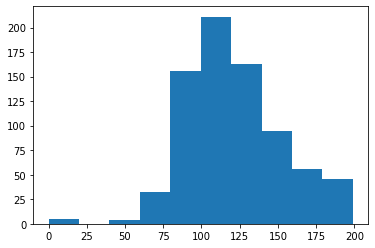

In [220]:
plt.hist(diabetes_data['Glucose'],bins=10)

##### (f) 실제로 Glucose 피쳐의 0값이 존재하는것을 확인할수있다.

### (G) min()값이 0으로 돼있는 피처에 대해 0값의 건수 및 전체 데이터건수 대비 몇 퍼센트의 비율 확인해보자

확인할 피쳐는 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' (단, Pregnancies는 출산횟수이므로 제외)

In [221]:
# 0값을 검사할 피처 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' ]

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()
#total_count = len(diabetes_data)
#print(total_count)

#피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고 , 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


##### (g) SkinThickness와 Insulin의 0값은 대단히 많음. 전체데이터건수가 많지않기때문에 이들 데이터를 삭제할경우 효과적학습이 어려움.

### (H) 0값들을 평균값으로 대체

In [ ]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
print(mean_zero_features)
print(type(mean_zero_features))
print(zero_features)
print(type(zero_features))

#zero가 있는 피처확인
print(diabetes_data[zero_features])

#대체
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0,mean_zero_features)



### (I) 피처 스케일링 적용해 변환 (로지스틱회귀의 경우 일반적으로 숫자데이터에 스케일링을 적용)

In [253]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

#StandardScaler 클래스를 이용. 피처데이터세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율:0.6111, F1:0.6804, AUC:0.8433


##### (i) 데이터 변환과 스케일링을 통해 성능 수치가 일정수준 개선됨.
##### 여전히 재현율 수치는 개선이 필요해 보입니다.

### (J) 분류결정임곗값을 변화시키면서 재현율 값의 성능수치가 어느정도 개선되는지 확인

임곗값을 0.3 ~ 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화를 출력.(임곗값에 따른 평가 수치 출력은 앞에서 사용한 get_eval_by_threshold()함수를 이요

In [254]:
#앞서 진행했던 함수 복사 및 모듈 import
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    #thresholds list객체 내의 값을 차례로 iteration하면서 evaluation수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        

In [ ]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
final_result = get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

**자꾸 NaN데이터가 존재한다고하여 데이터 확인했으나, get_clf_eval 함수파라메터 누락이었음**

test_df = pd.DataFrame(pred_proba[:,1].reshape(-1,1))

np.isnan(test_df).any()

##### (j) 정확도와 정밀도를 희생시키고 재현율을 높이는 임곗값은 0.3입니다(저의 결과는 교재와 다름), 하지만 정밀도가 낮아 극단적선택임.
##### 임곗값 0.48이 전체적인 성능평가지표를 유지하면서 재현율을 약간 상승(0.61 -> 0.64)시키는 좋은임곗값으로 보임.

### (K) 임곗값을 기본 0.5가 아닌, 0.48로 낮추어 예측

사이킷런의 predict()메서드는 임곗값변환이 안되므로, Binarizer클래스를 이용해 predict_proba()로 추출한 예측결과 확률값을 변환해 변경된 임곘값에 따른 예측 클래스 값을 구해보겠습니다

In [255]:
#앞서 predict로 예측한 결과 비교위해 복사해옴  --실행안해도됨
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]


#StandardScaler 클래스를 이용. 피처데이터세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율:0.6111, F1:0.6804, AUC:0.8433


In [262]:
#임곗값을 0.48로 설정한 Binarizer생성
binarizer = Binarizer(threshold=0.48)

#위에서구한 lr_clf의 predict_proba()예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer변환.
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차행렬
[[88 12]
 [19 35]]
정확도:0.7987, 정밀도:0.7447, 재현율:0.6481, F1:0.6931, AUC:0.8433


##### (k) 예측 확률 임곗값을 0.48로 낮추었더니, 오차행렬에서 positive로예측 건수가 많이졌음을 확인할수있고
##### 정확도는 유지, 정밀도는 약간하락, 재현율은 상승, F1스코어 상승, auc동일. 하도록 예측되었습니다

## 07. 정리

### 분류에 사용되는 정확도, 오차행렬, 정밀도, 재현율, F1스코어, ROC-AUC와 같은 성능평가지표를 살펴봤습니다

### 특히 , 이진분류의 레이블 값이 불균형하게 분포될경우 예측결과와 실제 결과가 일치하는 지표인 정확도만으로는 머신러닝 모델의 예측성능을 평가할수없음(불균형분포 = 0이 매우많고, 1이 매우적을경우 또는 반대의 경우)

### 오차행렬: Negative와 Positive값을 가지는 실제 클래스 값과 예측 클래스 값이 T와 F에 따라 TN,FP,FN,TP로 매핑되는 4분면 행렬을 기반으로 예측 성능을 평가합니다. 
### 정확도,정밀도,재현율 수치는 TN,FP,FN,TP값을 결합해 만들어지며, 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알수있다.

### 정밀도(Precision)와 재현율(Recall)은 Positive데이터 세트의 예측성능에 좀더 초점을 맞춘 평가 지표.
### 특히, 재현율이 중요한 지표는 암양성예측모델(암발생positive를 negative로 오판단할경우 큰 영향)
### 분류하려는 업무특성상 재현율또는 정밀도가 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)를 조정하여 가능

### F1스코어 : 정밀도와 재현율을 결합한 평가 지표. 어느한쪽으로 치우치지않을때 높은 지표값을 가짐.

### ROC-AUC는 일반적으로 이진 분류의 성능 평가를 위해 가장많이 사용되는 지표. AUC는 ROC곡선밑의 면적으로써 1에 가까울수록 좋은 수치.

# 끝.